In [2]:
import os.path
from math import ceil
from math import cos
from math import floor
from math import sin

import numpy
import pygame
from pygame import Surface
from pygame.locals import *

import constants
from geometry import equals, getDistance
from without_form.env_without_form import Agent
from without_form.env_without_form import Drawable
from without_form.env_without_form import Env
from without_form.env_without_form import Wall

from constants import *
from colors import *

import pandas

from matplotlib import cm, pyplot as plt
from viz5 import *

pygame 2.1.2 (SDL 2.0.18, Python 3.7.11)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [3]:
W = numpy.array(range(101))/10
dir_name = os.path.join('../..', 'run3')
df=pandas.read_excel(os.path.join(dir_name, 'report.xlsx'), index_col=0)
df.head()

Вес скорости избегания столкновении  Вес скорости достижения цели  \
id                                                                      
0                                   0.0                           0.0   
1                                   0.1                           0.0   
2                                   0.2                           0.0   
3                                   0.3                           0.0   
4                                   0.4                           0.0   

    Количество выживших агентов  Количество итерации  
id                                                    
0                             9                  NaN  
1                             9                  NaN  
2                             9                  NaN  
3                             9                  NaN  
4                             9                  NaN

In [4]:
df.columns=[ 'w1', 'w2', 's', 't']

In [5]:
df

w1    w2  s   t
id                      
0       0.0   0.0  9 NaN
1       0.1   0.0  9 NaN
2       0.2   0.0  9 NaN
3       0.3   0.0  9 NaN
4       0.4   0.0  9 NaN
...     ...   ... ..  ..
10196   9.6  10.0  0 NaN
10197   9.7  10.0  0 NaN
10198   9.8  10.0  0 NaN
10199   9.9  10.0  0 NaN
10200  10.0  10.0  0 NaN

[10201 rows x 4 columns]

In [6]:
df=df[df['w2']>0]
df.shape

(10100, 4)

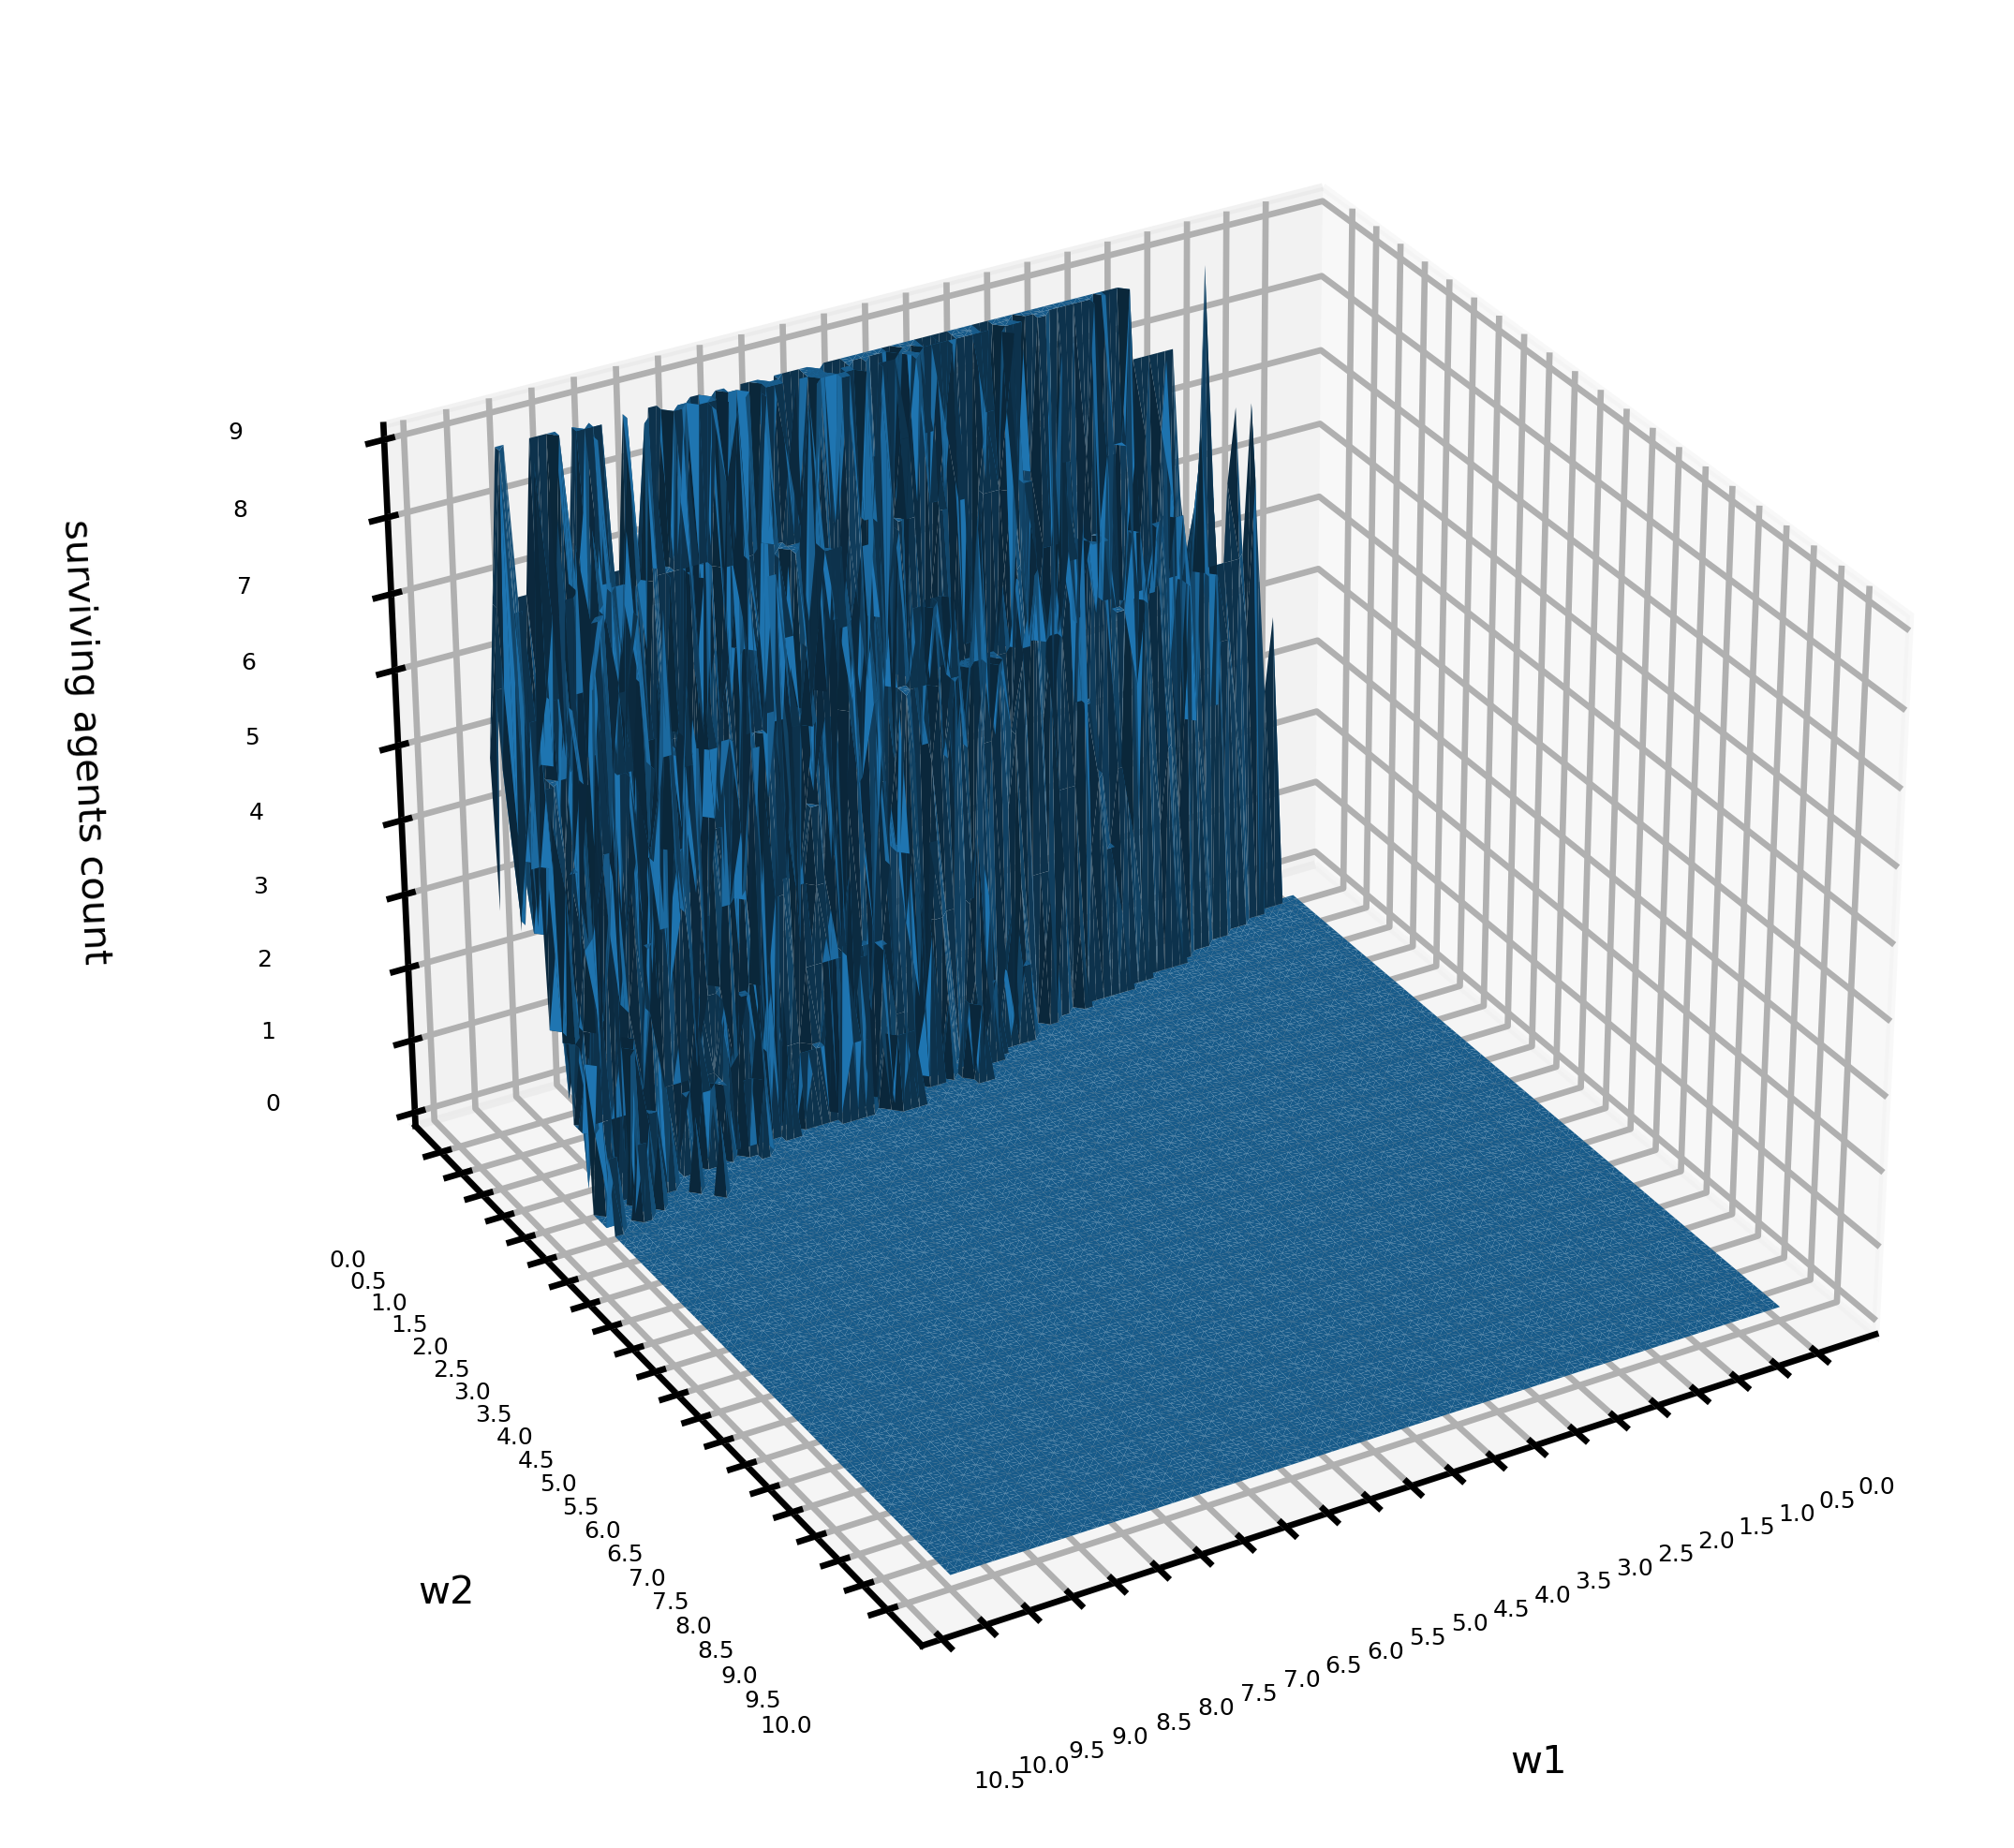

In [7]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111, projection='3d')

# ax.set(xlabel='w1', ylabel='w2', zlabel='number of surviving agents')
ax.set_xlabel('w1', fontsize=5)
ax.set_ylabel('w2', fontsize=5)
ax.set_zlabel('surviving agents count', fontsize=5)
ax.xaxis.set_tick_params(labelsize=3)
ax.yaxis.set_tick_params(labelsize=3)
ax.zaxis.set_tick_params(labelsize=3)
ax.set_xticks(numpy.arange(start=0, stop=11, step=0.5))
ax.set_yticks(numpy.arange(start=0, stop=11, step=0.5))
ax.set_zticks(range(26))
ax.view_init(30, 60)
ax.plot_trisurf(df['w1'], df['w2'],
                    df['s'],  linewidth=0.1)
fig.savefig(os.path.join(dir_name, 'stat', 'time.png'))
plt.show()

In [8]:

df1=df[df['w2']<2.7]


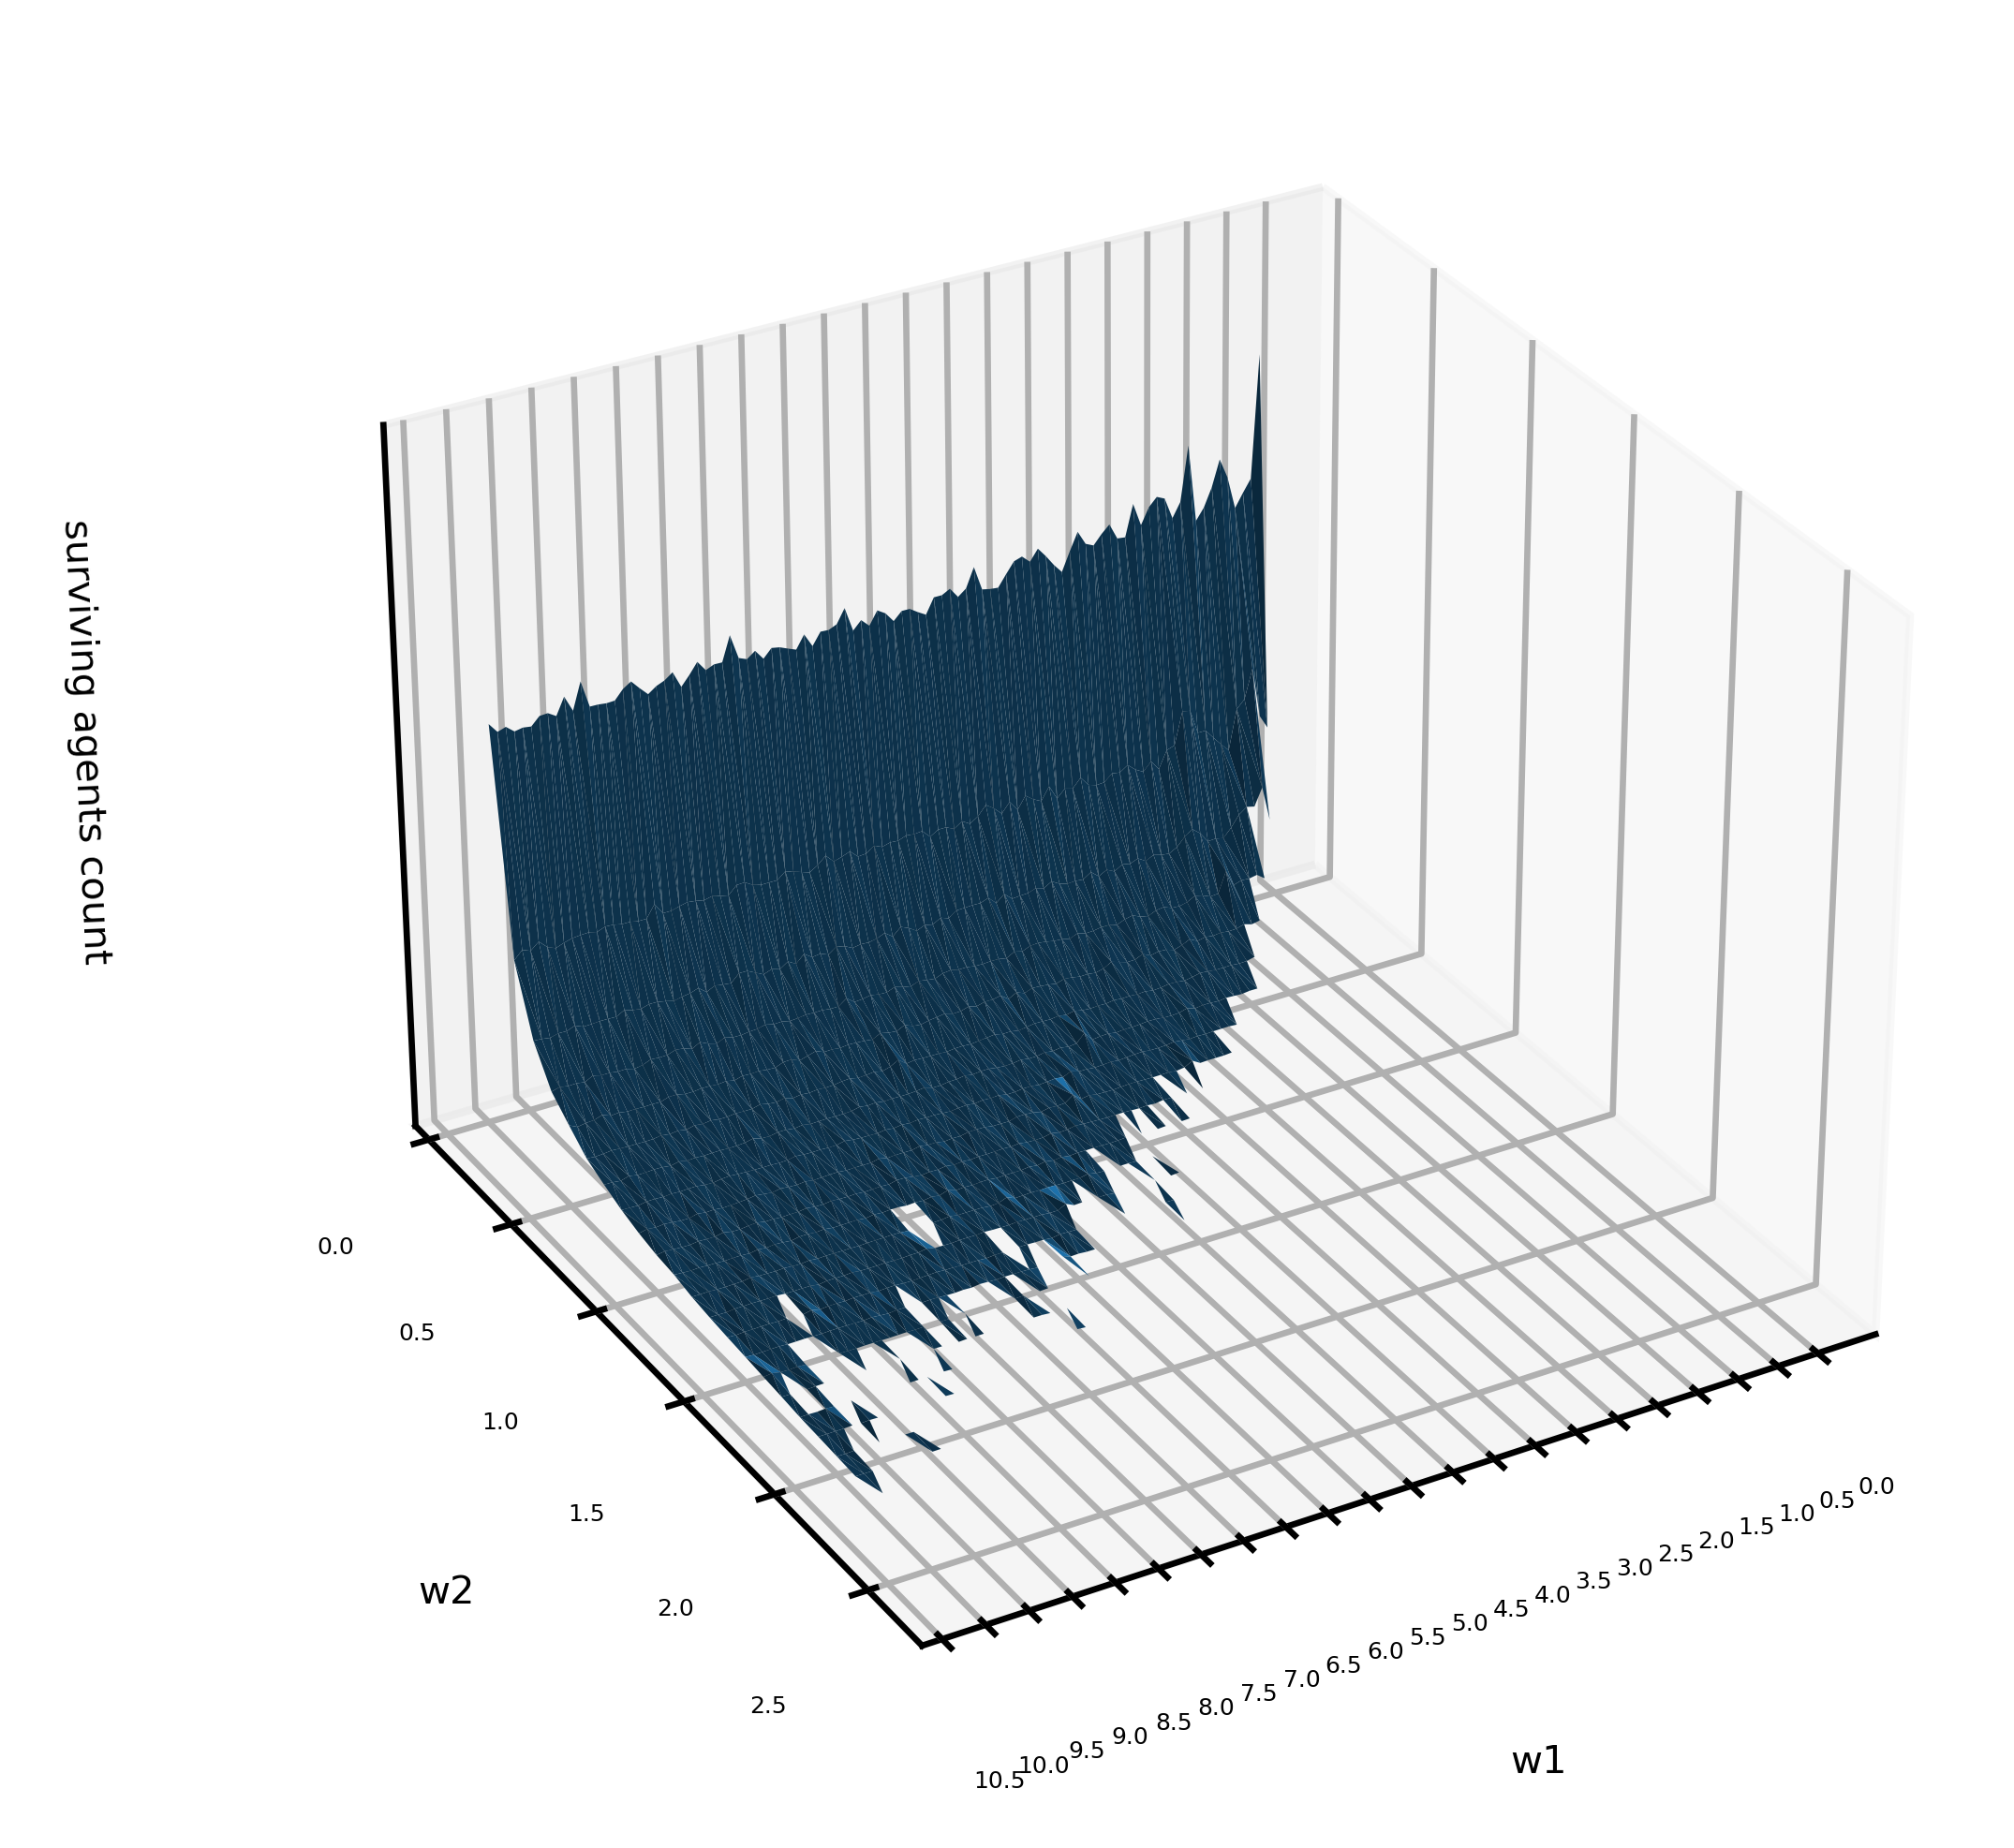

In [9]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111, projection='3d')

# ax.set(xlabel='w1', ylabel='w2', zlabel='number of surviving agents')
ax.set_xlabel('w1', fontsize=5)
ax.set_ylabel('w2', fontsize=5)
ax.set_zlabel('surviving agents count', fontsize=5)
ax.xaxis.set_tick_params(labelsize=3)
ax.yaxis.set_tick_params(labelsize=3)
ax.zaxis.set_tick_params(labelsize=3)
ax.set_xticks(numpy.arange(start=0, stop=11, step=0.5))
ax.set_yticks(numpy.arange(start=0, stop=11, step=0.5))
ax.set_zticks(range(26))
ax.view_init(30, 60)
ax.plot_trisurf(df1['w1'], df1['w2'],
                    df1['t'],  linewidth=0.1)
fig.savefig(os.path.join(dir_name, 'stat', 'time.png'))
plt.show()

In [10]:
W12=numpy.arange(start=0, stop=3, step=0.1)
W11=numpy.arange(start=0, stop=10.1, step=0.1)
zS=numpy.zeros((W11.size, W12.size))
zS[:, :]=None
zT=numpy.zeros((W11.size, W12.size))
zT[:, :]=None
for index, row in df1.iterrows():
    i=int(row['w1']*10)
    j=int(row['w2']*10)
    zS[i][j]=row['s']
    zT[i][j]=row['t']

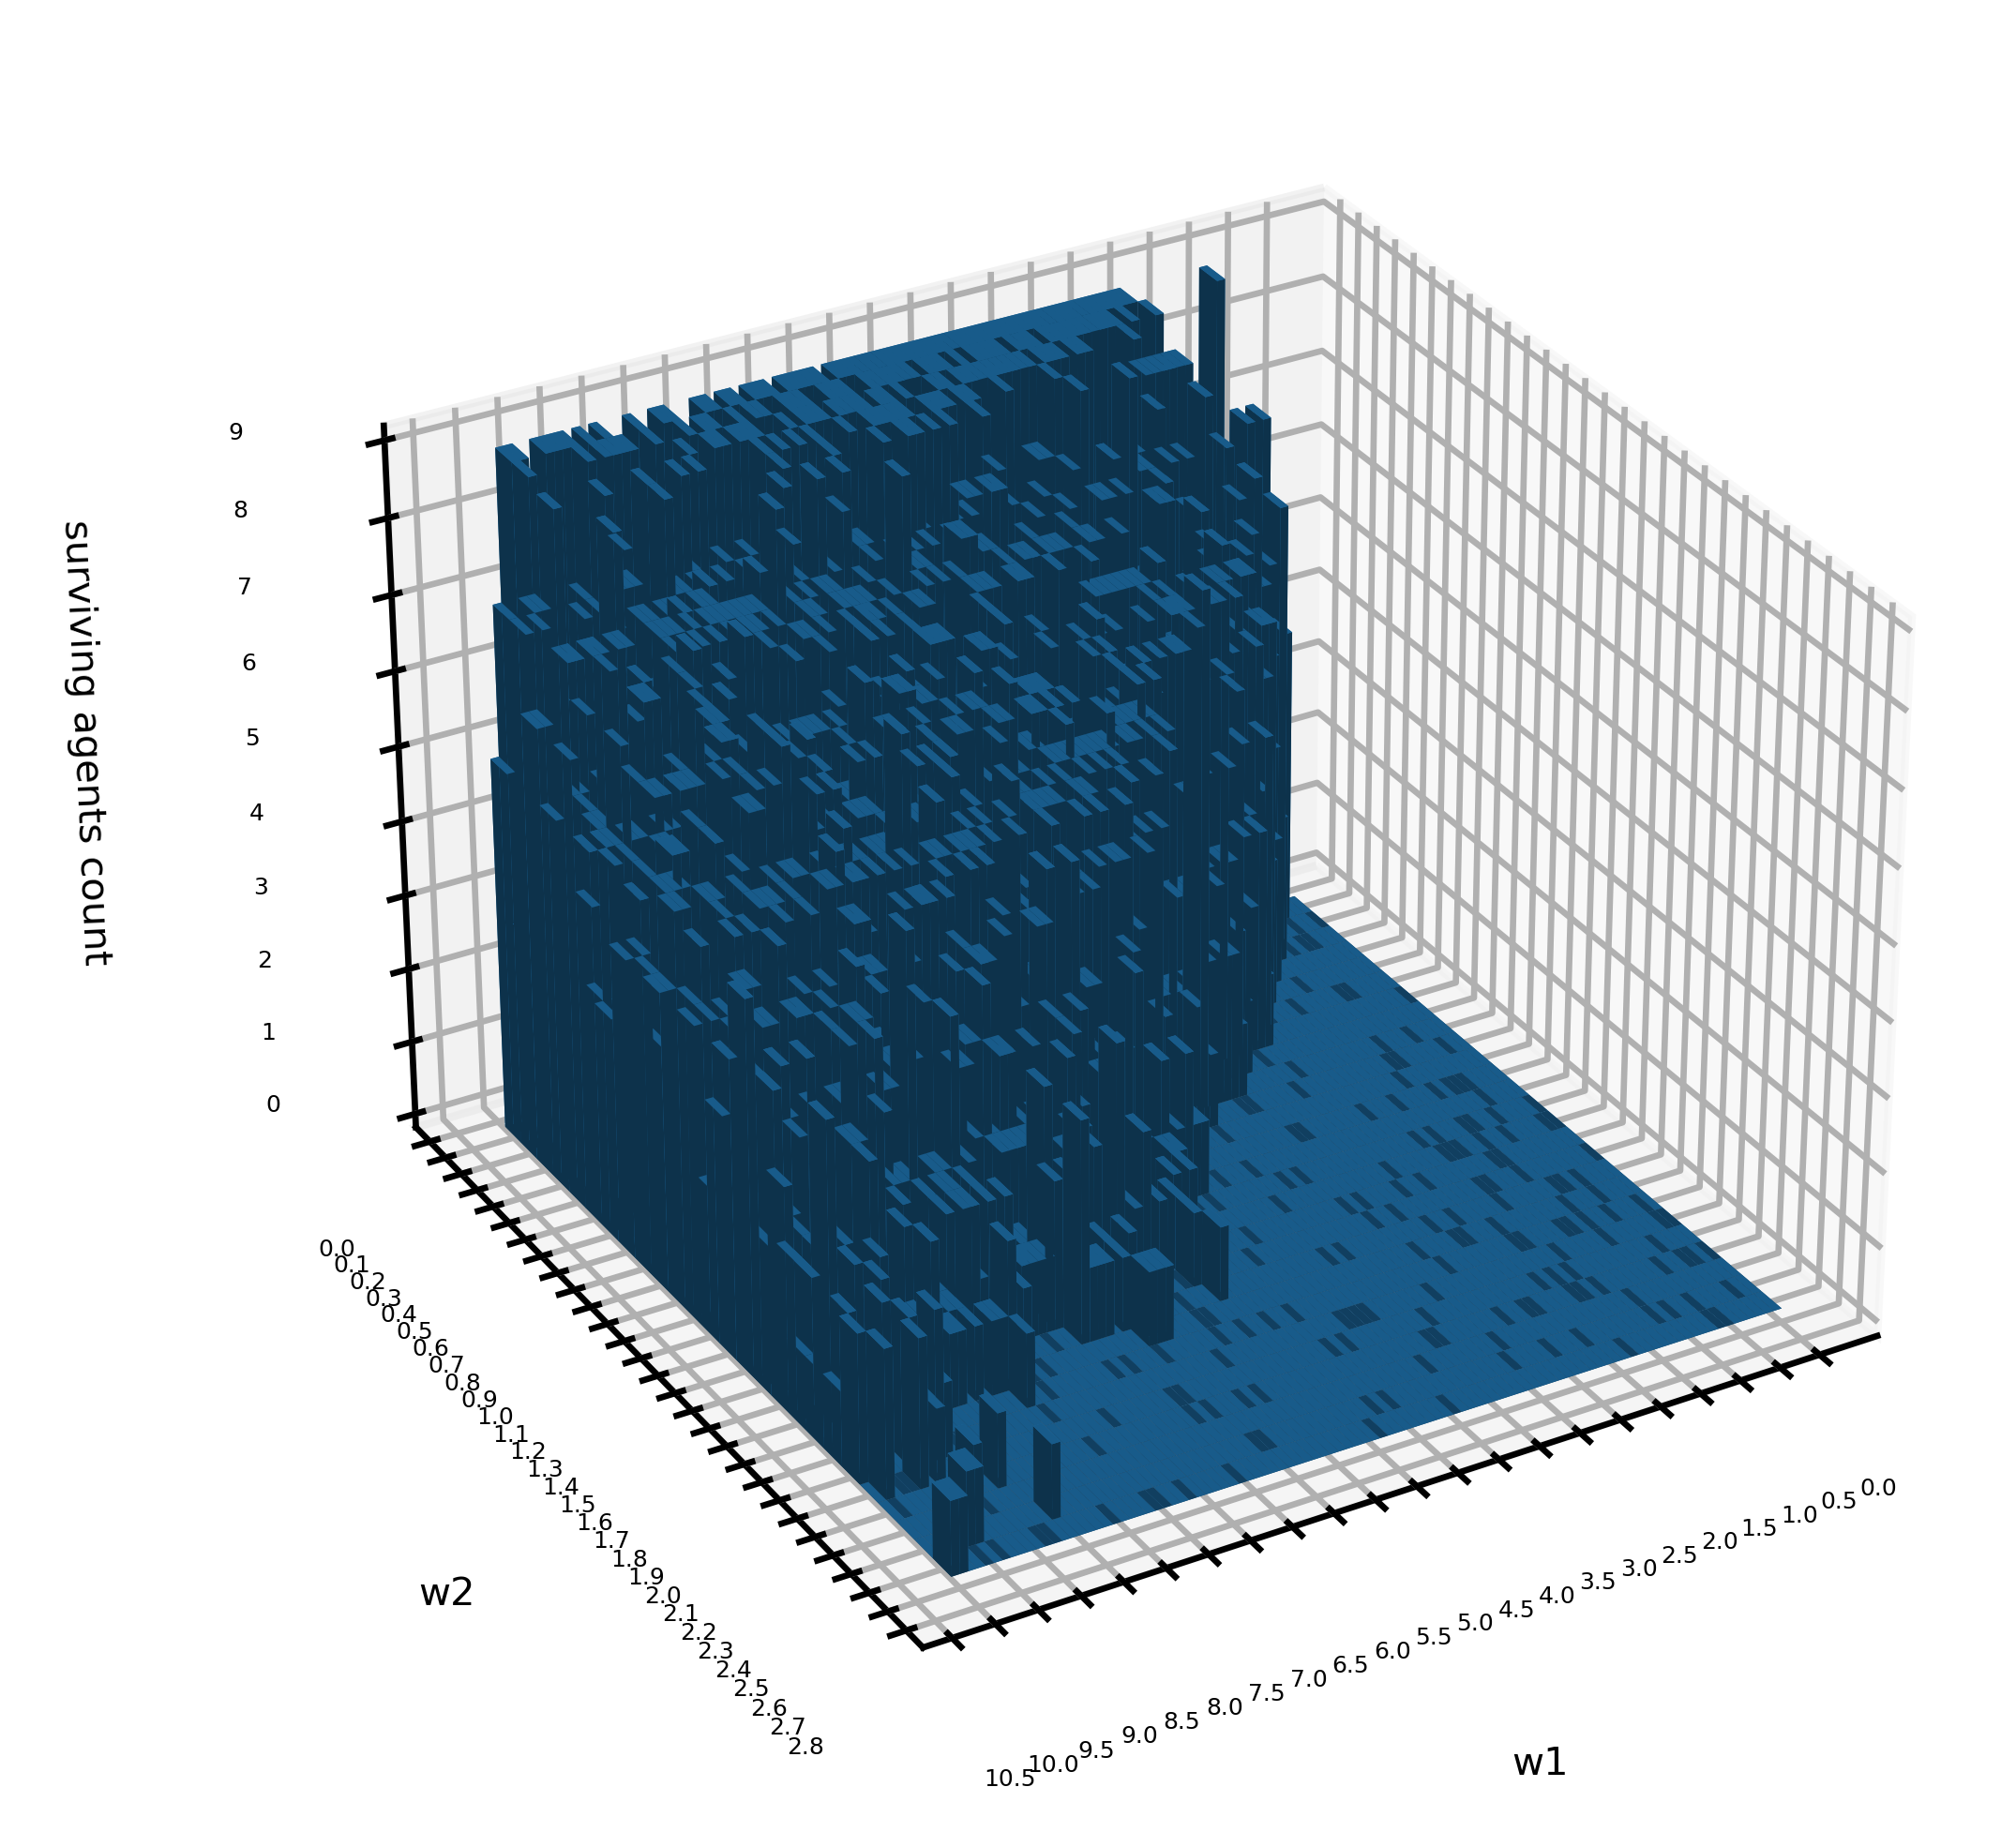

In [11]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111, projection='3d')

# ax.set(xlabel='w1', ylabel='w2', zlabel='number of surviving agents')
ax.set_xlabel('w1', fontsize=5)
ax.set_ylabel('w2', fontsize=5)
ax.set_zlabel('surviving agents count', fontsize=5)
ax.xaxis.set_tick_params(labelsize=3)
ax.yaxis.set_tick_params(labelsize=3)
ax.zaxis.set_tick_params(labelsize=3)
ax.set_xticks(numpy.arange(start=0, stop=11, step=0.5))
ax.set_yticks(numpy.arange(start=0, stop=3, step=0.1))
ax.set_zticks(range(26))
ax.view_init(30, 60)
dd=numpy.ones(df1.shape[0])/10
ax.bar3d(df1['w1'], df1['w2'],
                    numpy.zeros(df1.shape[0]), dd,dd, df1['s'],shade=True)
fig.savefig(os.path.join(dir_name, 'stat', 'time.png'))
plt.show()

In [12]:
N = 3
sensor_range = 5
ROBOT_RADIUS = 1
Dx, Dy = desiredXYSquarePattern(N, sensor_range + ROBOT_RADIUS)
env = Env(500, 500, 250, 450, N * N, Dx, Dy, SENSOR_RANGE, 250, 50, ROBOT_RADIUS, SENSOR_DETECTION_COUNT, MAX_T)
env.addObstacle(200, 200, 300, 300)

episode_gui(env, 9.5, 2.7,  draw_way=True)
env.t

0

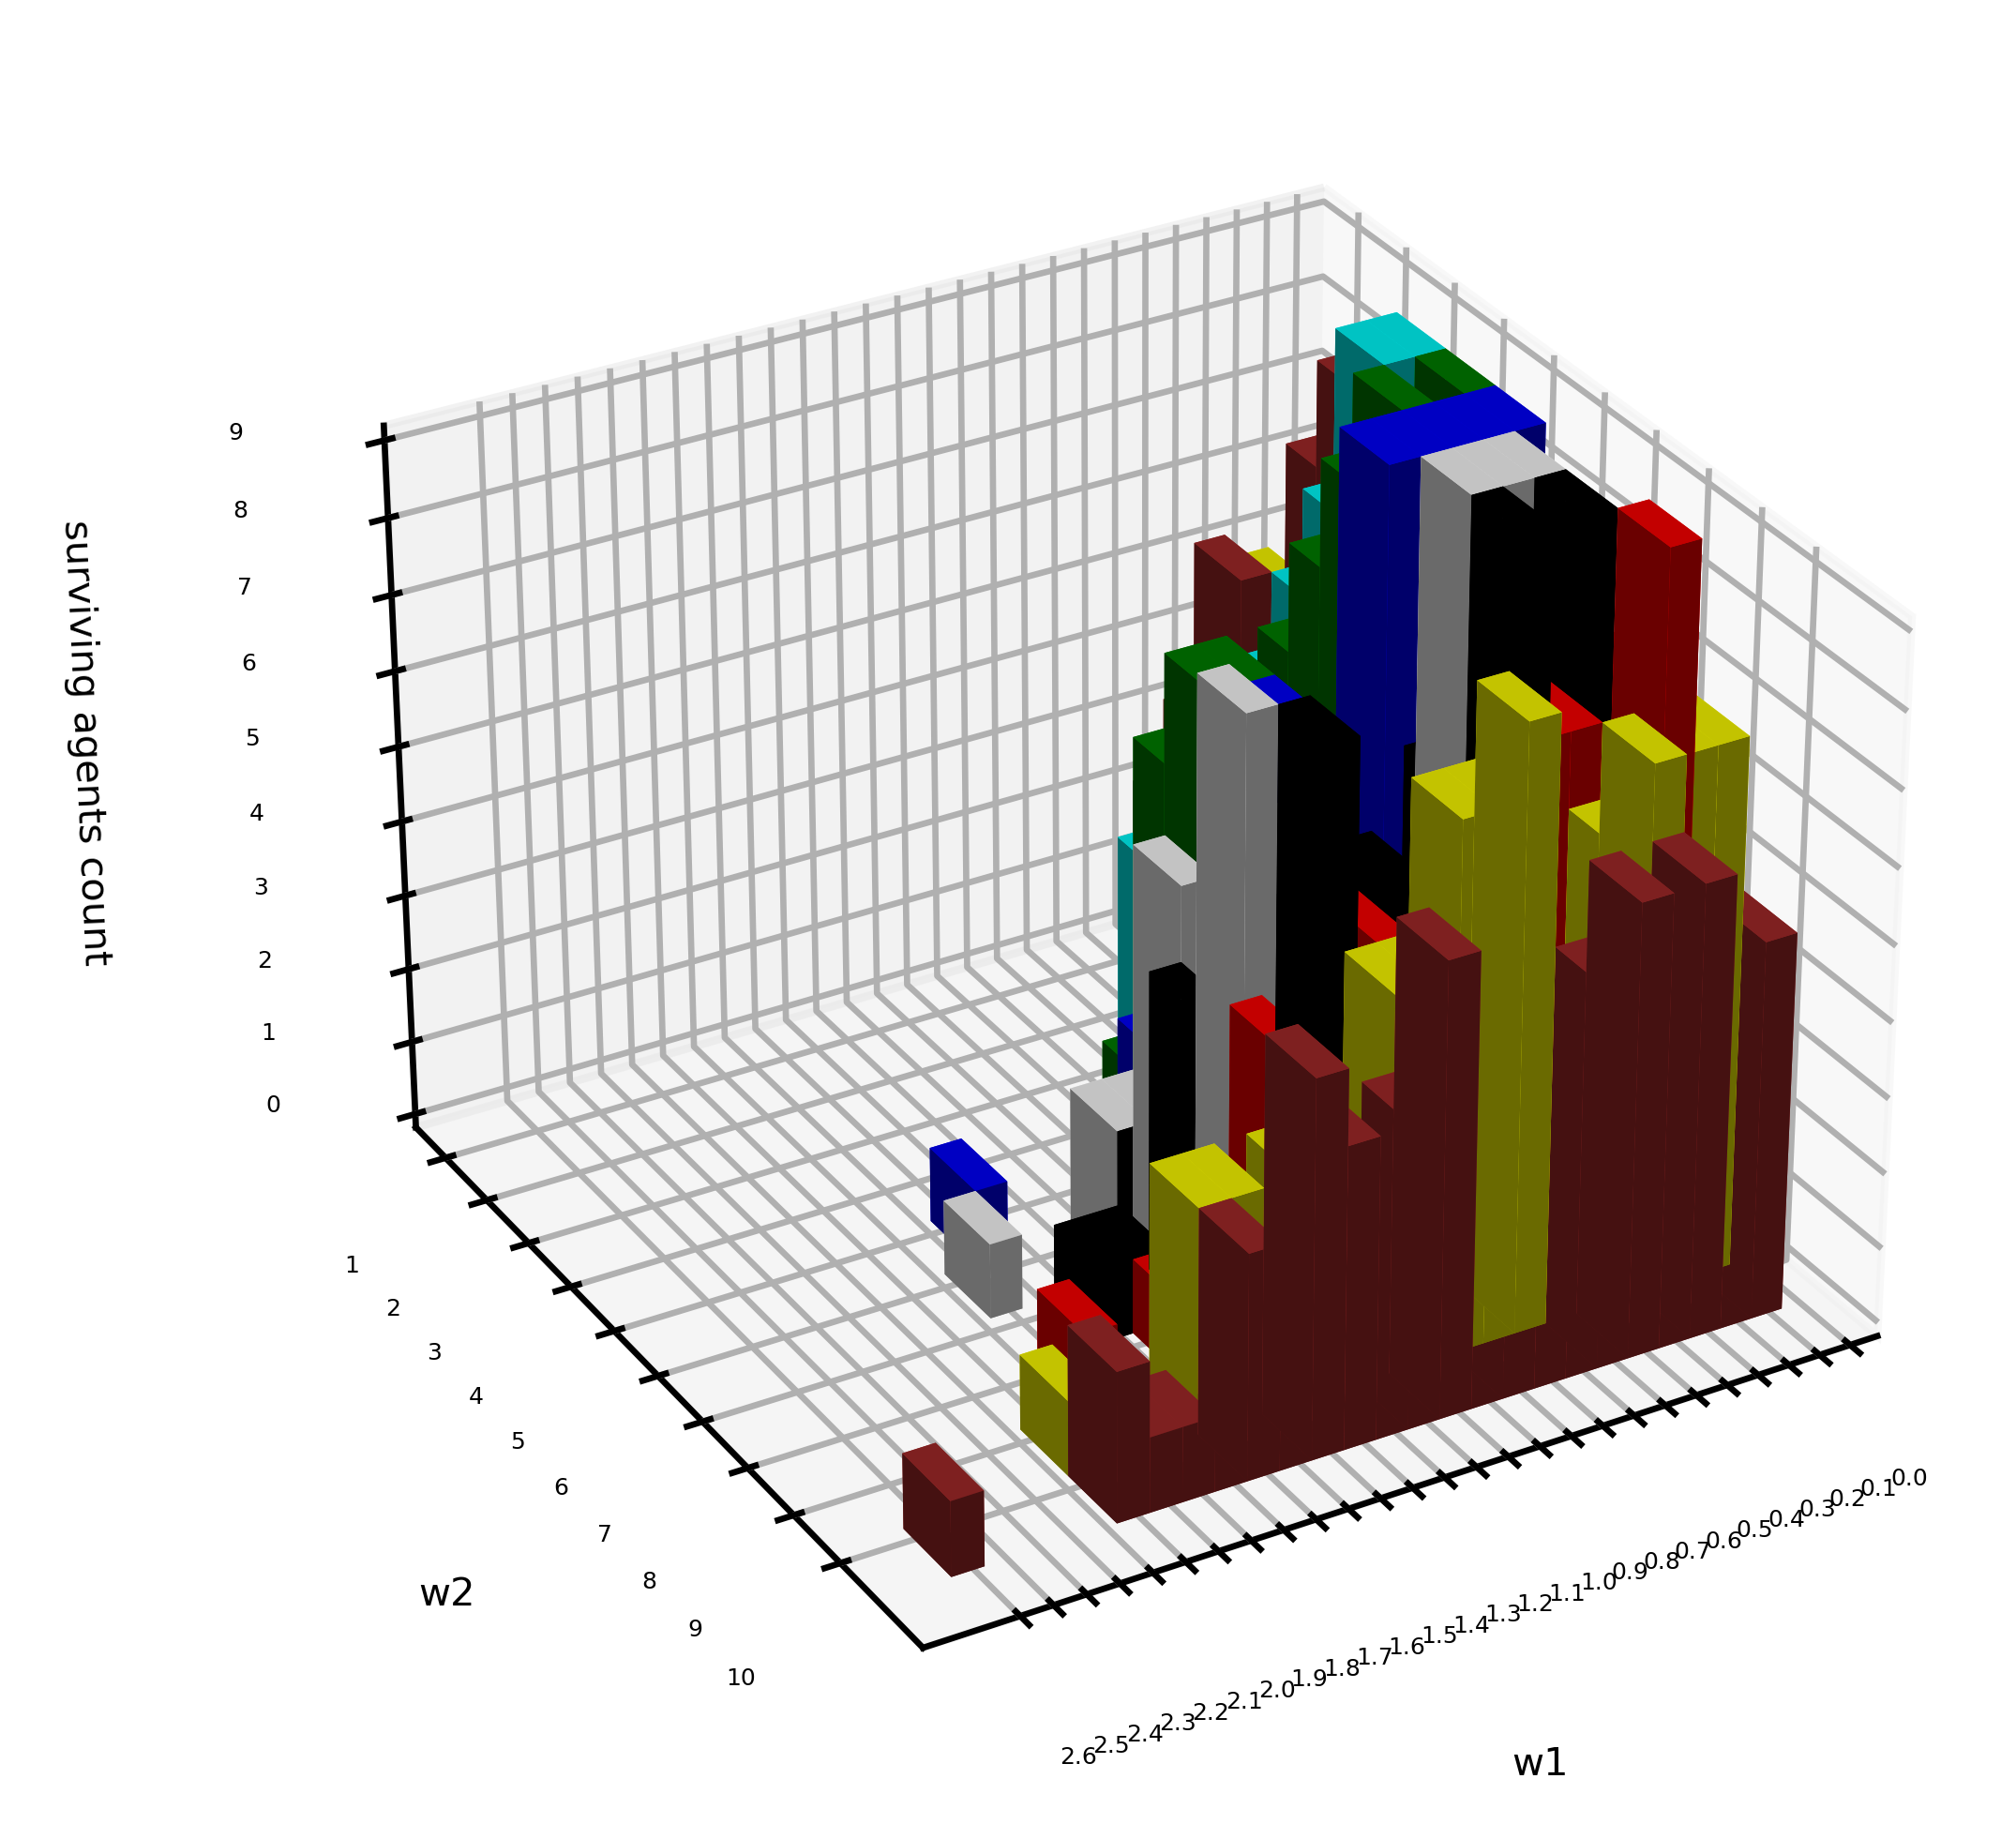

In [34]:
fig = plt.figure(dpi=600)
ax = fig.add_subplot(111, projection='3d')

# ax.set(xlabel='w1', ylabel='w2', zlabel='number of surviving agents')
ax.set_xlabel('w1', fontsize=5)
ax.set_ylabel('w2', fontsize=5)
ax.set_zlabel('surviving agents count', fontsize=5)
ax.xaxis.set_tick_params(labelsize=3)
ax.yaxis.set_tick_params(labelsize=3)
ax.zaxis.set_tick_params(labelsize=3)
ax.set_yticks(numpy.arange(start=0, stop=11, step=1))
ax.set_xticks(numpy.arange(start=0, stop=2.7, step=0.1))
ax.set_zticks(range(10))
ax.view_init(30, 60)
dd=0.1

colors = ['red', 'yellow', 'brown', 'cyan', 'green', 'blue', 'white', 'black']

for index, row in df1.iterrows():
    if(row['s']>0 and int(row['w1']*10)%10==0):
        ax.bar3d(row['w2'], row['w1'],
             0, 0.1, 1, row['s'], shade=True, color=colors[int(row['w1'])%len(colors)])
fig.savefig(os.path.join(dir_name, 'stat', 'time.png'))
plt.show()

In [14]:
W1test=[0, 0.1, 0.2, 0.5, 1, 2, 5, 10]
W2test=[0.1, 0.2, 0.5, 1, 1.5, 2]

In [26]:
df2=df[df['w1']==2]
df2[df2['s']>0].shape#.to_excel('report.xlsx')


(7, 4)

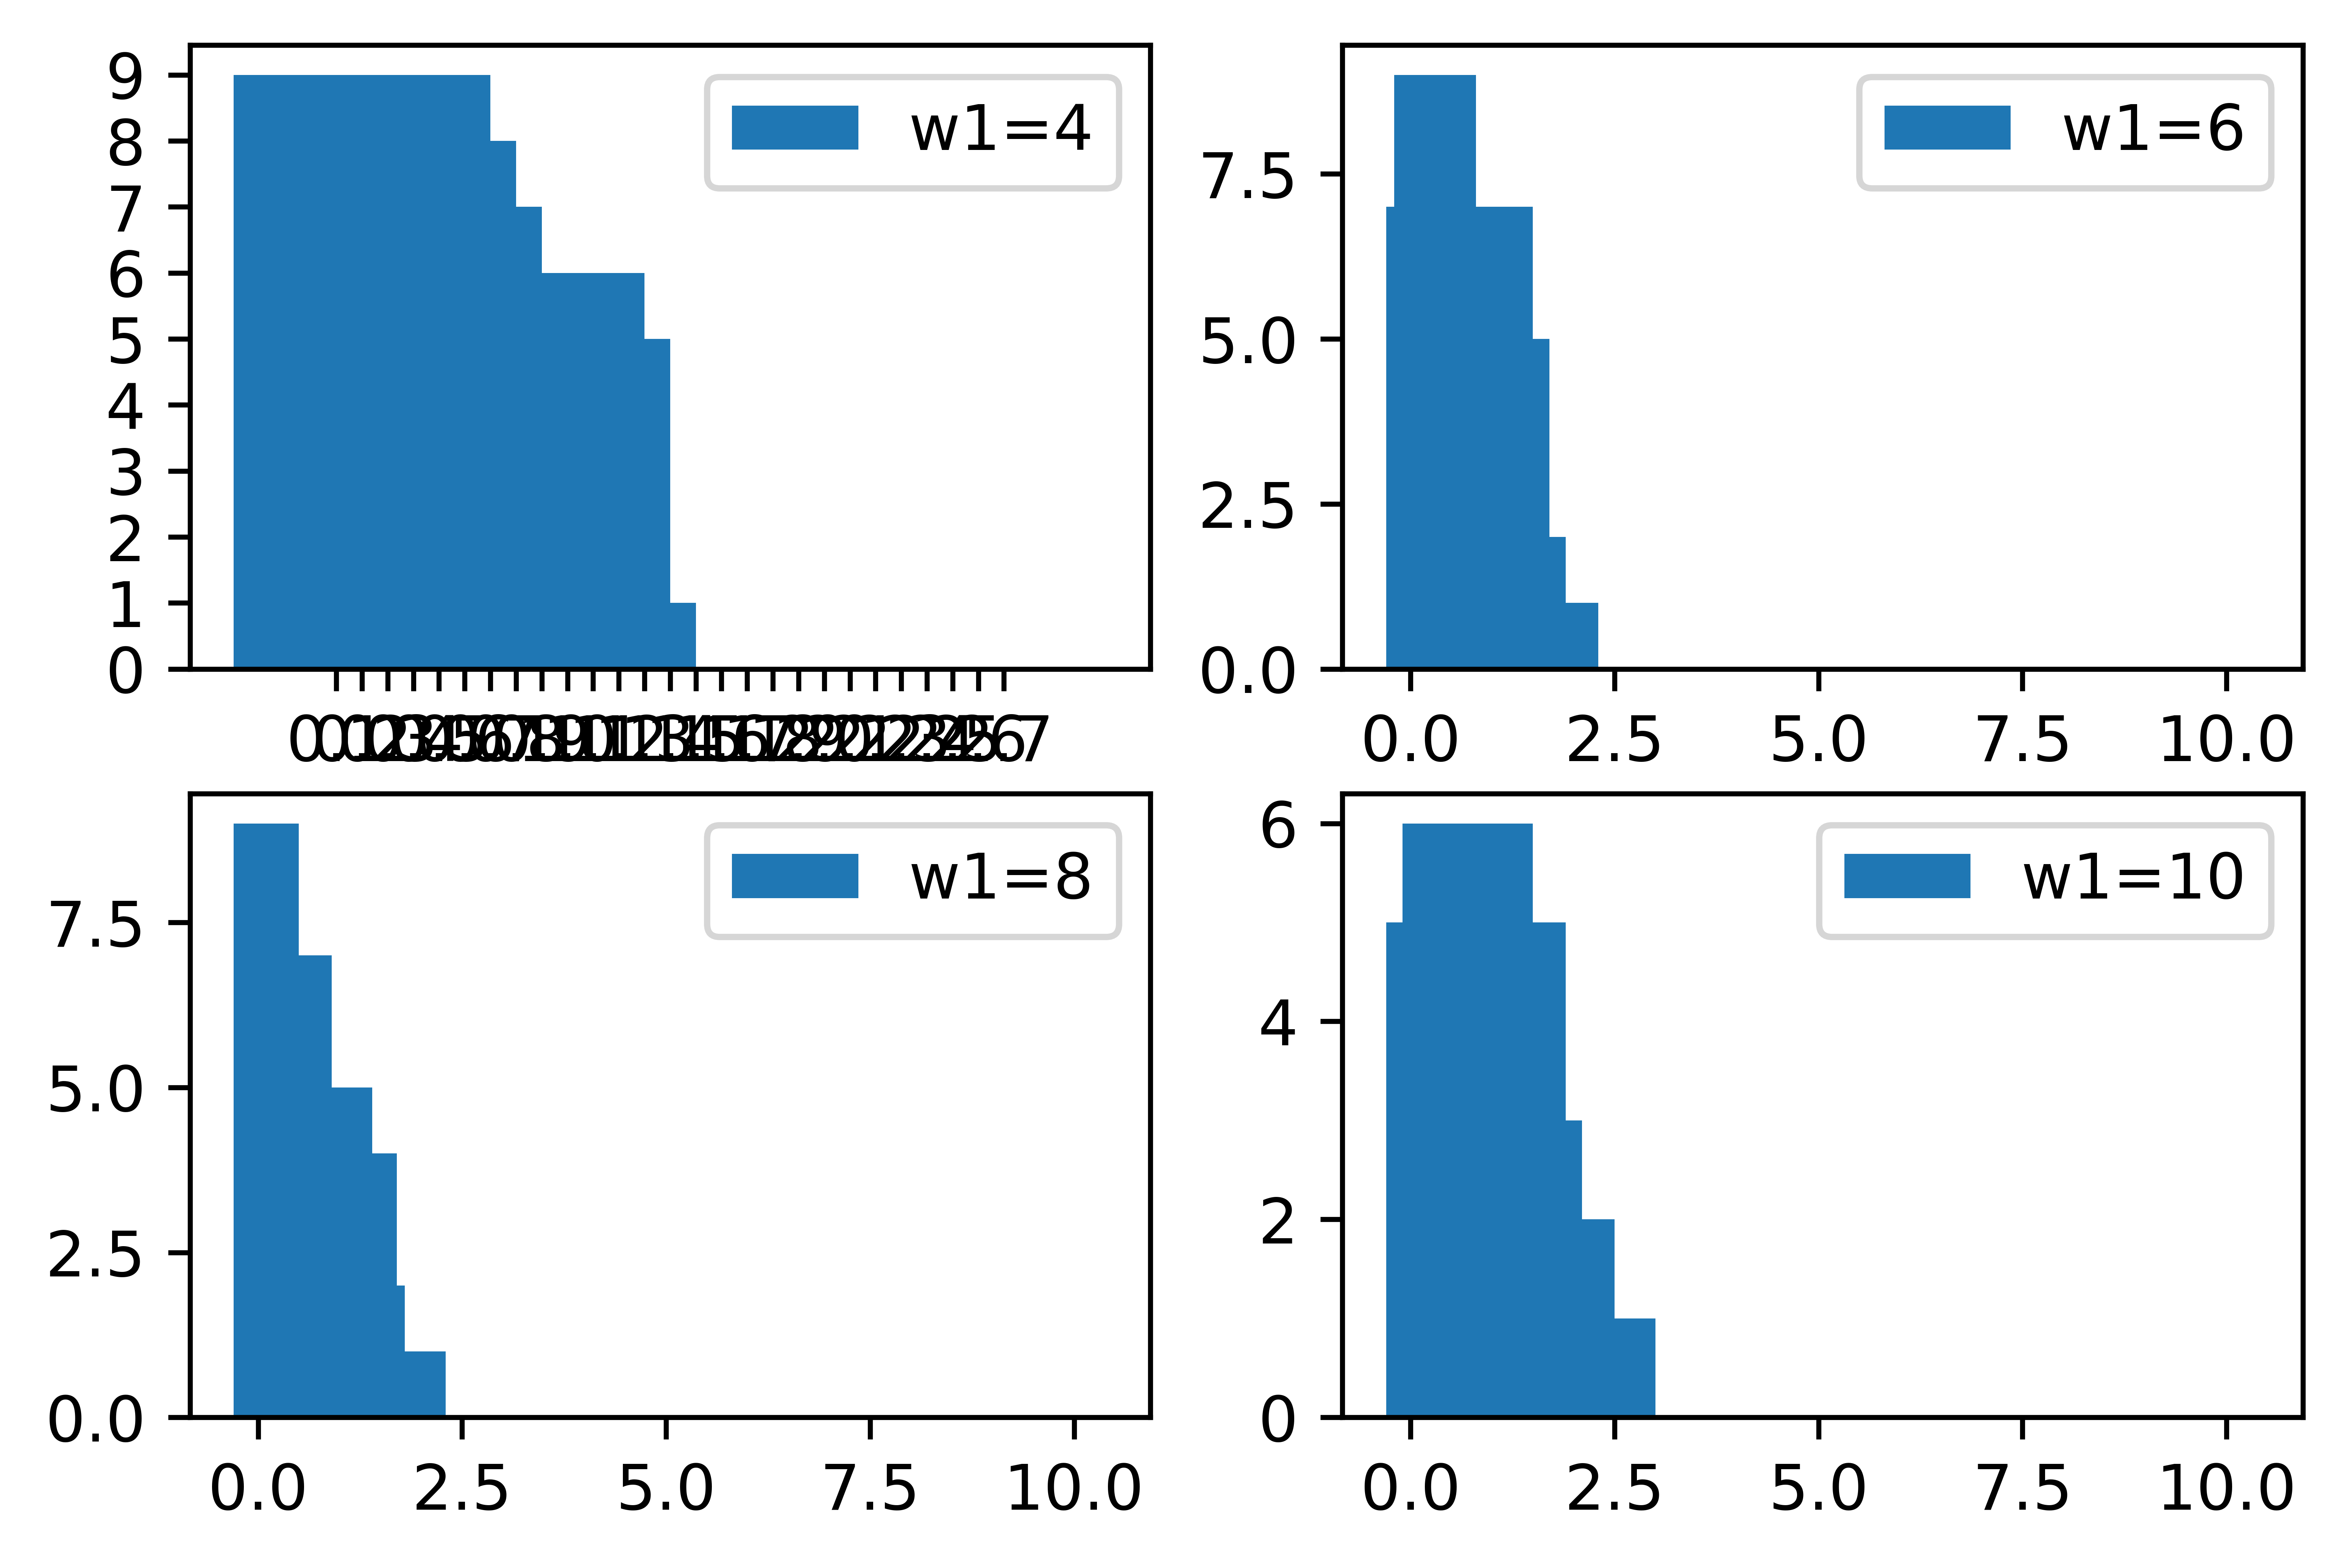

In [40]:
figure, axis=plt.subplots(2, 2, dpi=1200)

axis[0, 0].bar(W[1:28], df[df['w1']==4]['s'][:27])
axis[0, 0].legend(labels=['w1=4'])
axis[0,0].set_xlabel('w2')
axis[0, 0].set_yticks(range(10))
axis[0, 0].set_xticks(W[1:28])
axis[0, 1].bar(W[1:], df[df['w1']==6]['s'])
axis[0, 1].legend(labels=['w1=6'])
axis[1, 0].bar(W[1:], df[df['w1']==8]['s'])
axis[1, 0].legend(labels=['w1=8'])
axis[1, 1].bar(W[1:], df[df['w1']==10]['s'])
axis[1, 1].legend(labels=['w1=10'])
plt.show()

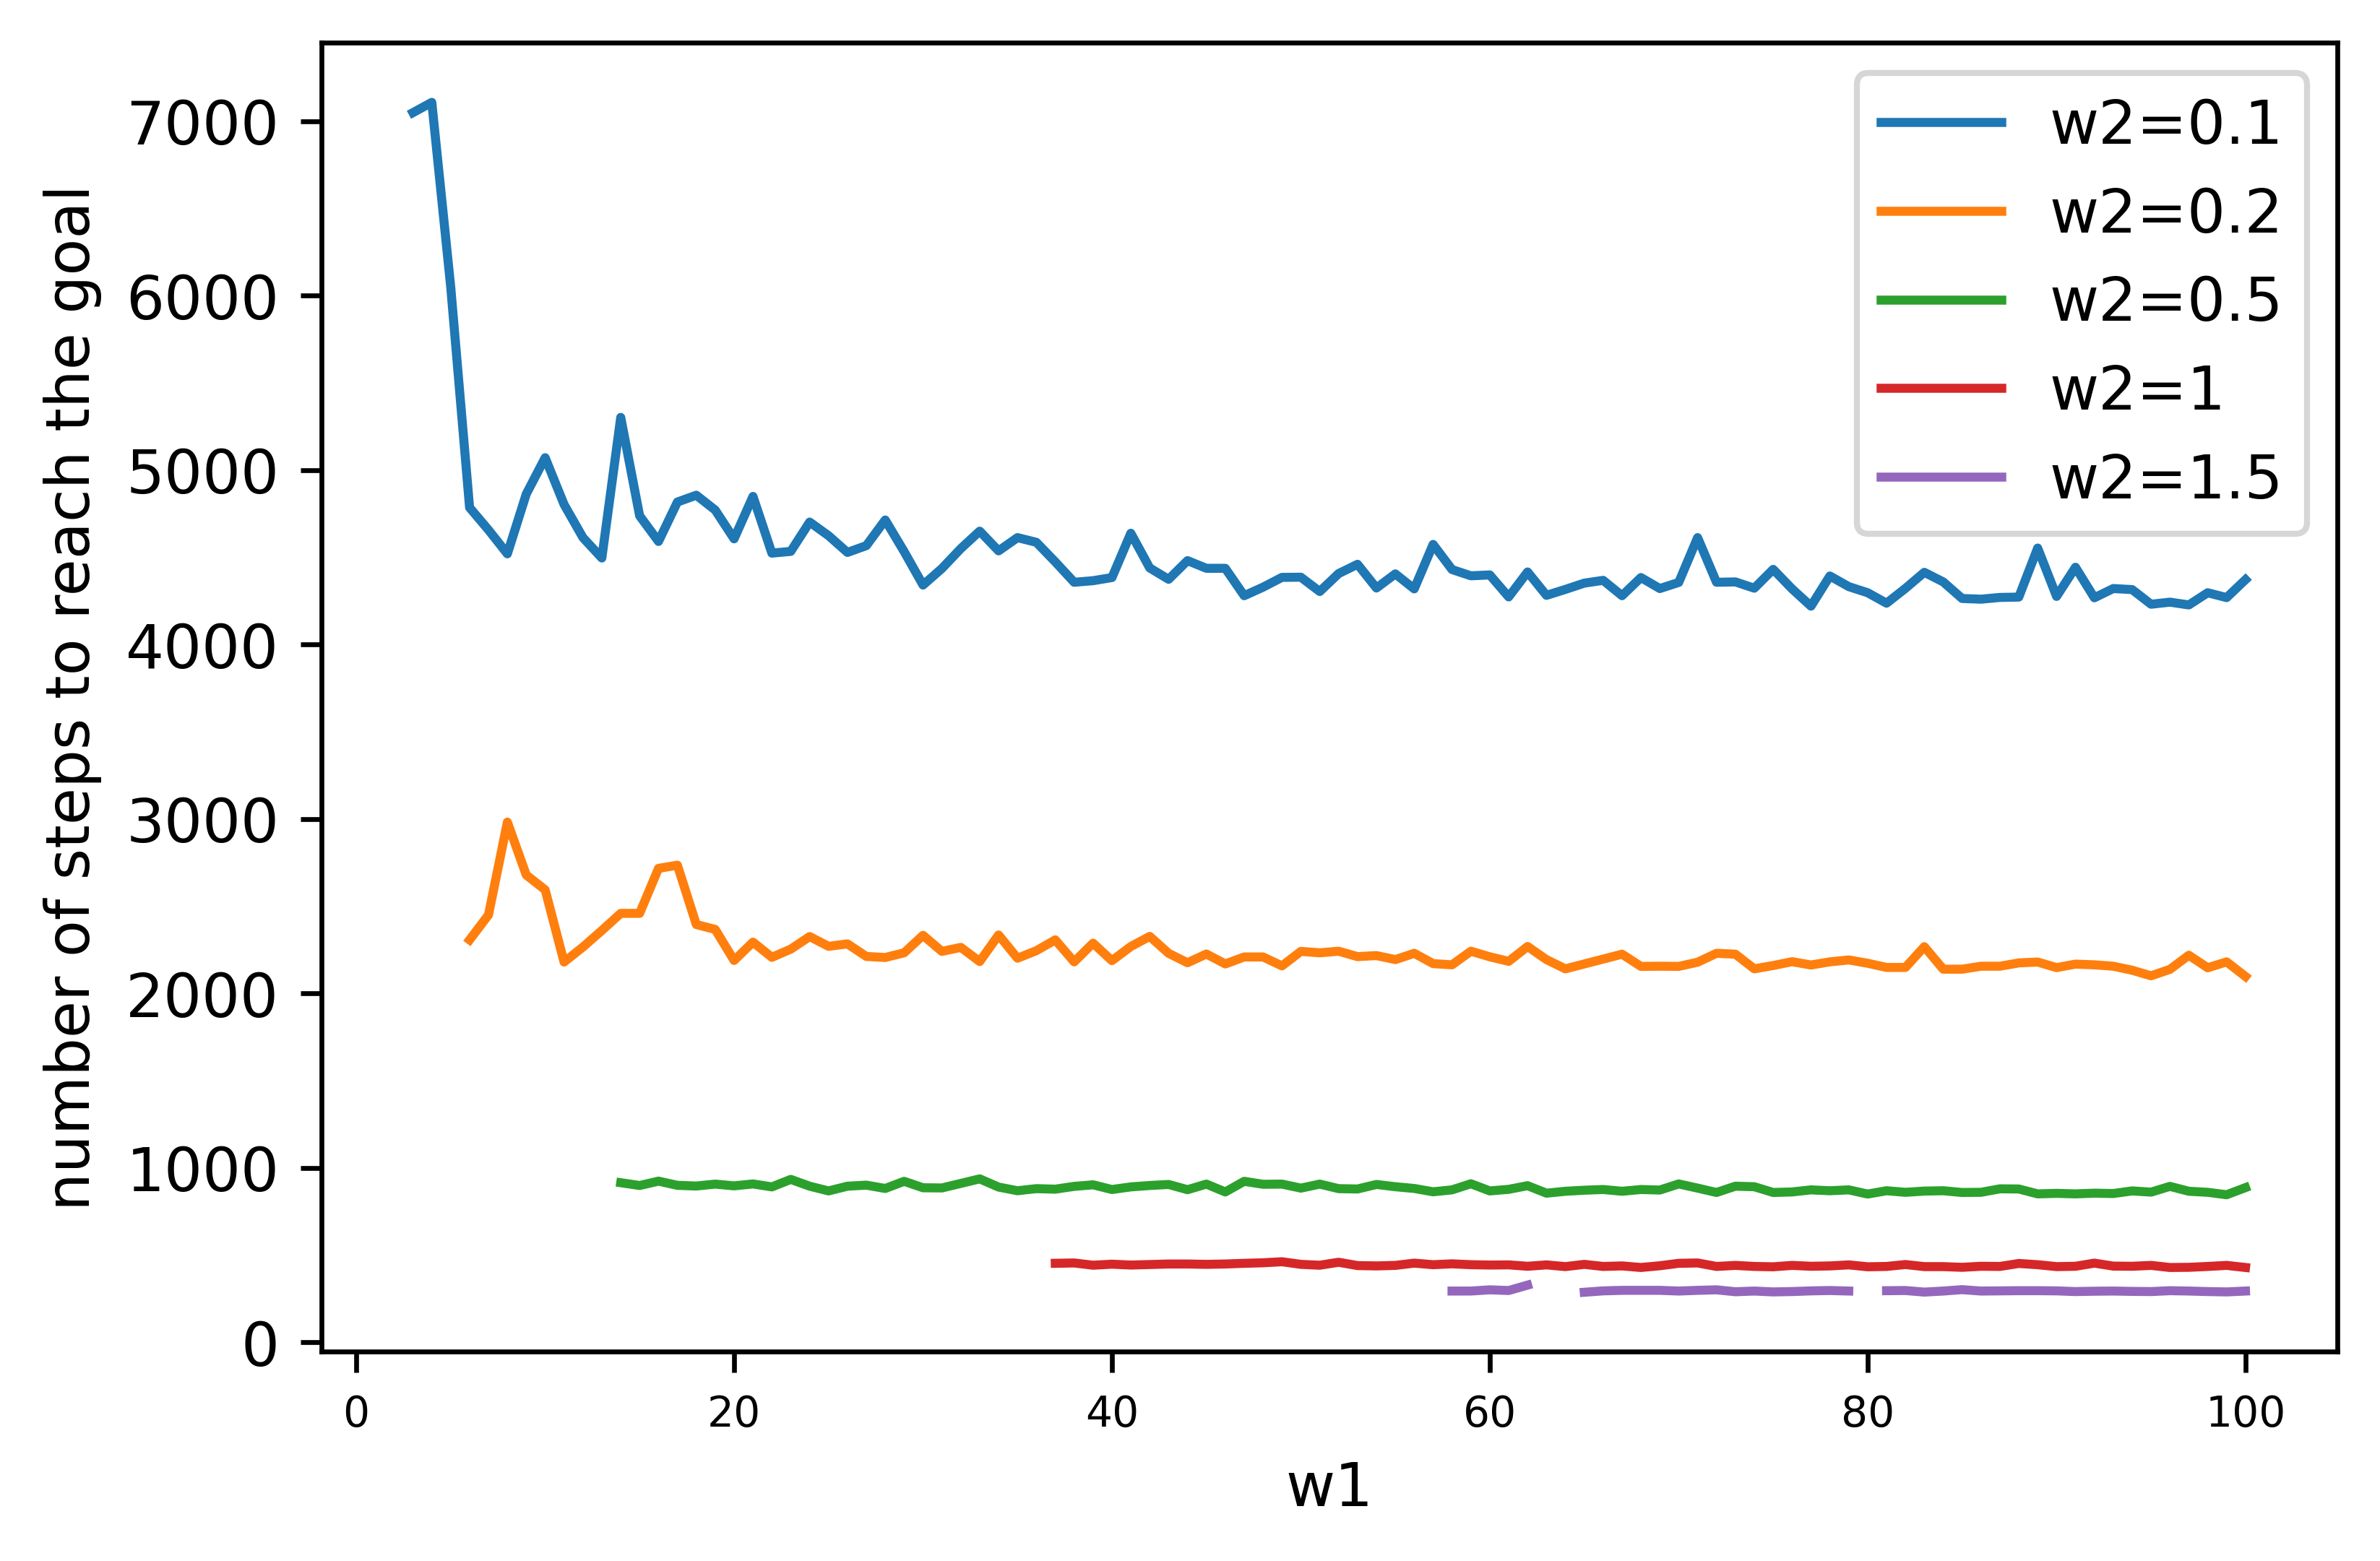

In [100]:
fig = plt.figure(dpi=600)
axis = fig.add_subplot(111)
plt.xticks(fontsize=7)
ax.yaxis.set_tick_params(labelsize=2)
ax.zaxis.set_tick_params(labelsize=2)
axis.plot(range(101), df[df['w2']==0.1]['t'])
axis.plot(range(101), df[df['w2']==0.2]['t'])
axis.plot(range(101), df[df['w2']==0.5]['t'])
axis.plot(range(101), df[df['w2']==1]['t'])
axis.plot(range(101), df[df['w2']==1.5]['t'])
axis.legend(labels=['w2=0.1', 'w2=0.2', 'w2=0.5', 'w2=1', 'w2=1.5'])
axis.set_xlabel('w1')
axis.set_ylabel('number of steps to reach the goal')
# axis.set_yticks(range(10))
# axis.set_xticks(range(101),W)
plt.show()

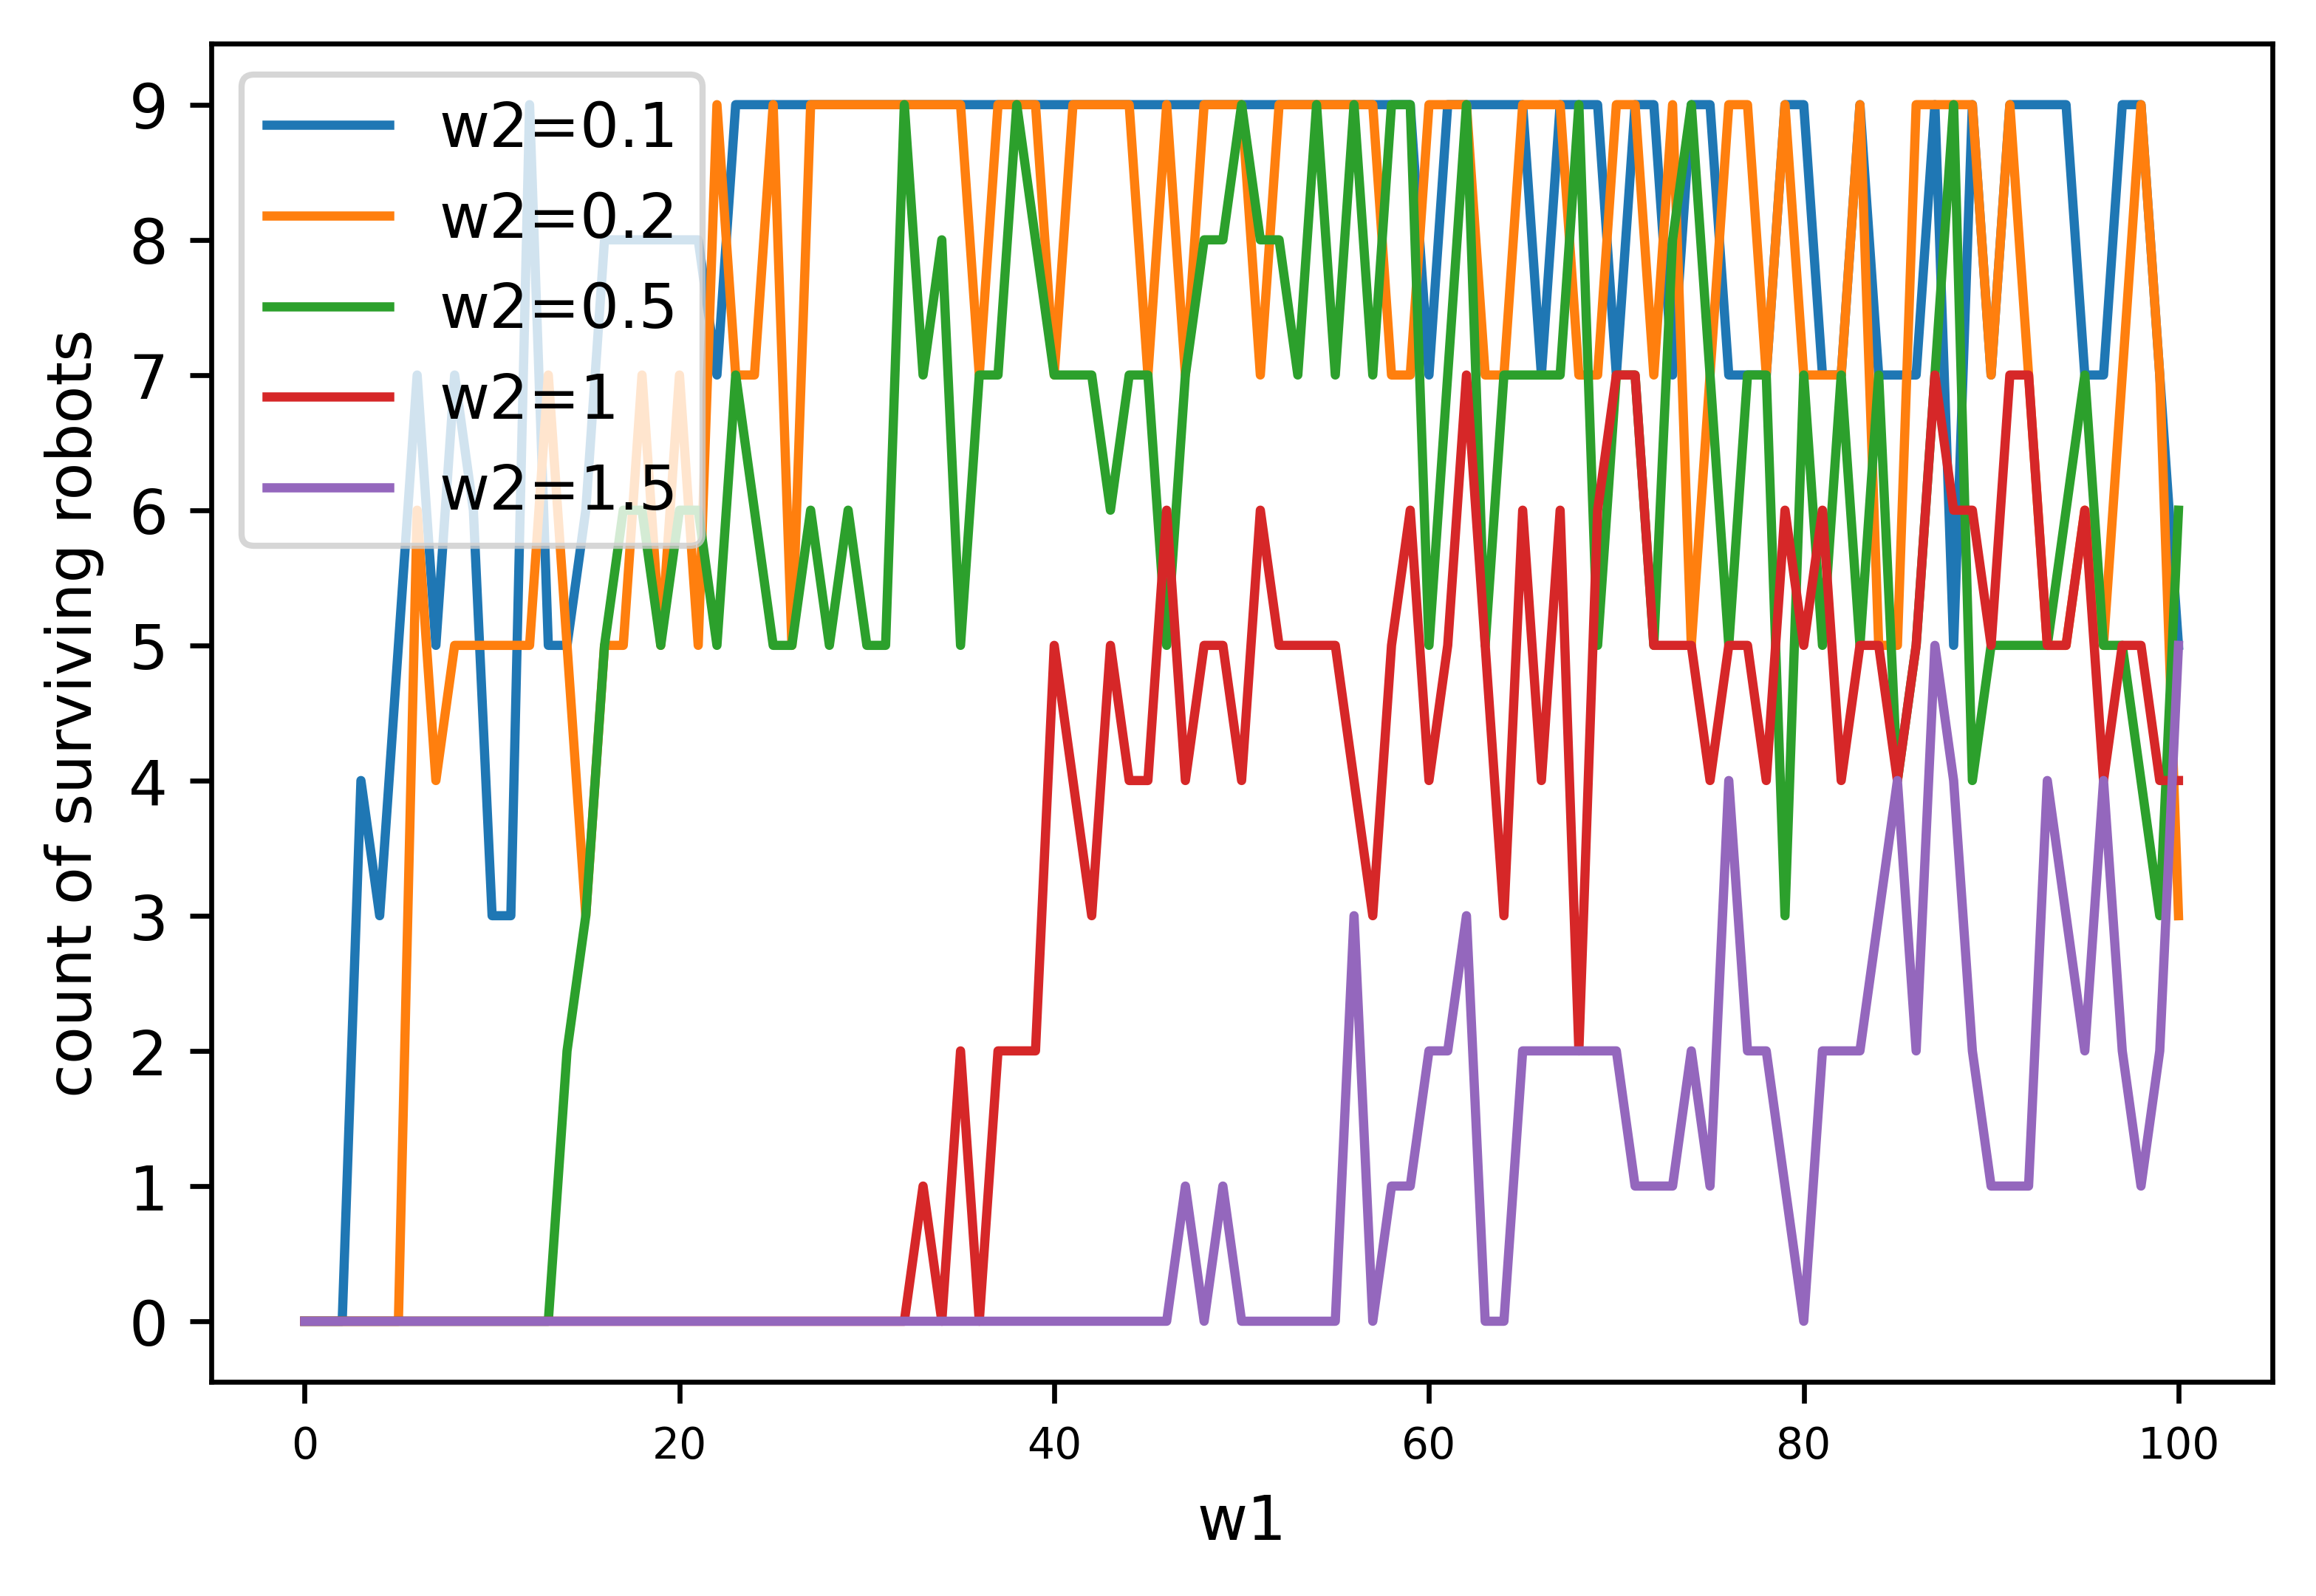

In [101]:
fig = plt.figure(dpi=600)
axis = fig.add_subplot(111)
plt.xticks(fontsize=7)
ax.yaxis.set_tick_params(labelsize=2)
ax.zaxis.set_tick_params(labelsize=2)
axis.plot(range(101), df[df['w2']==0.1]['s'])
axis.plot(range(101), df[df['w2']==0.2]['s'])
axis.plot(range(101), df[df['w2']==0.5]['s'])
axis.plot(range(101), df[df['w2']==1]['s'])
axis.plot(range(101), df[df['w2']==1.5]['s'])
axis.legend(labels=['w2=0.1', 'w2=0.2', 'w2=0.5', 'w2=1', 'w2=1.5'])
axis.set_xlabel('w1')
axis.set_ylabel('count of surviving robots')
axis.set_yticks(range(10))
# axis.set_xticks(range(101),W)
plt.show()

In [78]:
df2=df[df['w2']>=2]
df2[df2['s']>0].to_excel('report.xlsx')
